In [ ]:
%matplotlib inline

# Introduction to requests and API's

## What you will be able to do after the tutorial

- Understand what a (RESTful) API is
- Understand what a HTTP request is
- Use Python to make requests to an API
- Use Python to work with JSON data
- Use Python to read JSON data into a Dataframe and plot it
- Understand how to overcome some real-world complexities when using API's
      
      

## Prerequisites

Before we get started with using API's in python we need to know a little more first.

### APIs : What and why
    
An API (Application Programming interface) is a way for two different applications to communicate. Whilst the term applies to any two programs we are using it to refer to the API of a web service that provides data.

To retrieve data from an API, a request to a remote web server is made.

For example, if you want to build an application which plots stock prices, you would use the API of something like google finance to request the current stock prices.

APIs are useful where:
* Data is changing quickly, e.g. stock prices
* The whole dataset is not required, e.g. the tweets of one user
* Repeated computation is involved, e.g. Spotify API that tells you the genre of a piece of music

#### REST

Most API's you come across will be RESTful, i.e. they provide a REST (REpresentational State Transfer) interface.

REST uses standard HTTP commands which means that getting data from an API is similar to accessing a webpage. 

For example, When you type `www.duckduckgo.com` in your browser, your browser is asking the `www.duckduckgo.com` server for a webpage by making a `GET` HTTP (Hypertext Transfer Protocol) request. Making a `GET` request to a RESTful API instead retrieves data (rather than a webpage).

Similarly, while your browser uses `POST` to submit the contents of a form, REST APIs use `POST` to update data.

REST APIs also uses other HTTP commmands such as `PUT` - for creating data - and `DELETE` - for removing data.

HTTP is a text-based protocol (the response is always text) and could return a response in any format - this is typically found in the API documentation - though data is more often than not returned in JSON format.

As they are used to retrieve data `GET` requests are the most commonly used type of request, therefore we will restrict ourselves to `GET` in this tutorial.

#### JSON

JSON (JavaScript Object Notation) is a format for sending data, that is meant to be human readable and easy to parse (It was derived from JavaScript but is language-independent).

It uses attribute-value pairs (e.g. python dictionaries `{"name": "Pizza", "foodRanking": 1}`) and array data-types (e.g. python lists `[1, 2, 3]`)

Example JSON representation :
```
{
  "firstName": "Donald",
  "lastName": "Trump",
  "age": 73,
  "isAlive": true,
  "color": "orange",
  "addresses": [
      {
          "streetAddress": "1600 Pennsylvania Avenue NW",
          "city": "Washington, D.C.",
          "state": "null",
          "postalCode": "20500",
          "country": "US"
      },
      {
          "streetAddress": "721 Fifth Avenue",
          "city": "NYC",
          "state": "NY",
          "postalCode": "10022",
          "country": "US"
      }
  ],
}
```


#### Status codes

So we've sent off some mystery `GET` request but how do we know the request was successful?

Servers issue numeric [status codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) in response to HTTP requests that indicate whether a request has been successfully completed.

Some common ones relating to `GET` requests are:
* `200` - Success
* `300` - The API is redirecting to a different endpoint
* `400` - Bad request
* `401` - Not authenticated
* `403` - Forbidden
* `404` - Not found
* `429` - Too many requests

## Example API: luchtmeetnet

Let's dive in by looking at an API that can be of use to us, the [luchtmeetnet](https://api-docs.luchtmeetnet.nl/).

The documentation linked gives a very useful summary of the structure of the requests:
<!-- (![](https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/APIs/figures/eurostat_api.png?raw=1)) !-->
![](https://github.com/Timmarh/intro-apis/blob/main/imgs/api_url.png?raw=1)

The request consists of 2 parts. The first part is the url to the API itself. We will call this the base url, this url will stay the same for each request to this API. We can expand on this base url with a specification of what exactly we want from the api. This second part changes depending on what exactly we want from the API and how we want it. How exactly we have to specify this varies per API and can generally (if the API is set up well) be found in the [documentation](https://api-docs.luchtmeetnet.nl/) of the api. In our case it is.

We'll learn by example how to use Python to get the data for a REST GET request on this dataset.

We will use the Python library `requests` - https://github.com/psf/requests.

In [134]:
import requests
import pprint

base_url = 'https://api.luchtmeetnet.nl/open_api/'

response = requests.get(base_url + 'stations?order_by=&organisation_id=&page=')

pp = pprint.PrettyPrinter(indent=1)
pp.pprint(response.json())

{'data': [{'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkade', 'number': 'NL10445'},
          {'location': 'Fijnaart-Zwingelspaansedijk', 'number': 'NL10246'},
          {'location': 'Amsterdam-Haarlemmerweg', 'number': 'NL49002'},
          {'location': 'Amsterdam-Nieuwendammerdijk', 'number': 'NL49003'},
          {'location

In [135]:
station = 'NL49557'
response = requests.get(base_url + f'stations/{station}')
pp.pprint(response.json())

{'data': {'components': ['PM10', 'PM25', 'C6H6', 'C7H8', 'C8H10', 'C10H8'],
          'description': {'EN': 'Wijk aan Zee-Bosweg',
                          'NL': 'Wijk aan Zee-Bosweg'},
          'geometry': {'coordinates': [4.599313, 52.490052], 'type': 'point'},
          'location': 'Wijk aan Zee-Bosweg',
          'municipality': 'Beverwijk',
          'organisation': 'GGD Amsterdam',
          'province': None,
          'type': 'Industrial',
          'url': None,
          'year_start': '2020'}}


In [136]:
formula = 'C6H6'
response = requests.get(base_url + f'stations/{station}/measurements?formula={formula}')
pp.pprint(response.json())


{'data': [{'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T10:00:00+00:00',
           'value': 0.75},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T09:00:00+00:00',
           'value': 0.63},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T08:00:00+00:00',
           'value': 0.76},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T07:00:00+00:00',
           'value': 0.74},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T06:00:00+00:00',
           'value': 0.62},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T05:00:00+00:00',
           'value': 0.25},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T04:00:00+00:00',
           'value': 0.26},
          {'formula': 'C6H6',
           'timestamp_measured': '2023-03-29T03:00:00+00:00',
           'value': 0.18},
          {'formula': 'C6H6',
           'timest

## Convert the response to a dataframe.

There are many ways to convert an API response, or another json, to a pandas dataframe.
Here we will use the `json_normalize` fucntion, which comes in the pandas package.
For some other options, see this [website](https://sparkbyexamples.com/pandas/pandas-convert-json-to-dataframe/)

dict_keys(['value', 'timestamp_measured', 'formula'])


<Axes: >

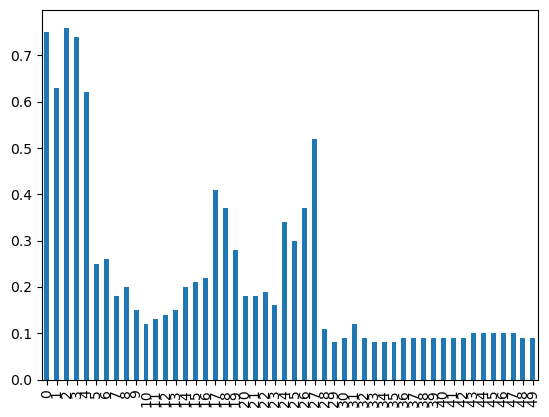

In [139]:
import pandas as pd

response_data = response.json()['data']
# pp.pprint(response_data)
print(response_data[0].keys())


response_df = pd.json_normalize(response_data)
response_df


response_df.value.plot(kind='bar')  # Make a bar plot


## CBS

Another example

In [141]:

import requests  # Import the requests library
import pandas as pd # Import pandas for later
import geopandas as gpd
import warnings
warnings.filterwarnings(action='once') ## This line makes sure you see warnings only once

# Downloaden van eerste 100 rijen uit de tabel

base_url = "https://beta-odata4.cbs.nl/"
url = base_url + f"CBS/83765NED/Observations?$top=100"
print(url)

response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
print(f"Request returned {response.status_code} : '{response.reason}'")

https://beta-odata4.cbs.nl/CBS/83765NED/Observations?$top=100
Request returned 200 : 'OK'


In [142]:
print(response.text)

{"@odata.context":"https://beta-odata4.cbs.nl/CBS/83765NED/$metadata#Observations","value":[{"Id":0,"Measure":"T001036","ValueAttribute":"None","Value":17081507.0,"WijkenEnBuurten":"NL00"},{"Id":1,"Measure":"3000","ValueAttribute":"None","Value":8475102.0,"WijkenEnBuurten":"NL00"},{"Id":2,"Measure":"4000","ValueAttribute":"None","Value":8606405.0,"WijkenEnBuurten":"NL00"},{"Id":3,"Measure":"10680","ValueAttribute":"None","Value":2781768.0,"WijkenEnBuurten":"NL00"},{"Id":4,"Measure":"53050","ValueAttribute":"None","Value":2101648.0,"WijkenEnBuurten":"NL00"},{"Id":5,"Measure":"53310","ValueAttribute":"None","Value":4214276.0,"WijkenEnBuurten":"NL00"},{"Id":6,"Measure":"53715","ValueAttribute":"None","Value":4824155.0,"WijkenEnBuurten":"NL00"},{"Id":7,"Measure":"80200","ValueAttribute":"None","Value":3159660.0,"WijkenEnBuurten":"NL00"},{"Id":8,"Measure":"1010","ValueAttribute":"None","Value":8201061.0,"WijkenEnBuurten":"NL00"},{"Id":9,"Measure":"1020","ValueAttribute":"None","Value":67184

In [143]:

# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON

import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)
# NOTE: Could use print(response.json()) but this wouldn't be formatted nicely

{'@odata.context': 'https://beta-odata4.cbs.nl/CBS/83765NED/$metadata#Observations',
 'value': [{'Id': 0,
            'Measure': 'T001036',
            'Value': 17081507.0,
            'ValueAttribute': 'None',
            'WijkenEnBuurten': 'NL00'},
           {'Id': 1,
            'Measure': '3000',
            'Value': 8475102.0,
            'ValueAttribute': 'None',
            'WijkenEnBuurten': 'NL00'},
           {'Id': 2,
            'Measure': '4000',
            'Value': 8606405.0,
            'ValueAttribute': 'None',
            'WijkenEnBuurten': 'NL00'},
           {'Id': 3,
            'Measure': '10680',
            'Value': 2781768.0,
            'ValueAttribute': 'None',
            'WijkenEnBuurten': 'NL00'},
           {'Id': 4,
            'Measure': '53050',
            'Value': 2101648.0,
            'ValueAttribute': 'None',
            'WijkenEnBuurten': 'NL00'},
           {'Id': 5,
            'Measure': '53310',
            'Value': 4214276.0,
            'V

---

**Tip:** it's easy to forget what attributes a variable like `response` has - was it `status_code` or `status`?
Use the function `dir` to list the contents of a variable.

``` python
dir(response)
```

If you're in a jupyter notebook you can also type "response." and then press `TAB` and an autocomplete bar will pop up.

---

**SUCCESS!** But what's the structure of our data?

In [144]:
payload['value']  # The values returned aren't very informative!

[{'Id': 0,
  'Measure': 'T001036',
  'ValueAttribute': 'None',
  'Value': 17081507.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 1,
  'Measure': '3000',
  'ValueAttribute': 'None',
  'Value': 8475102.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 2,
  'Measure': '4000',
  'ValueAttribute': 'None',
  'Value': 8606405.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 3,
  'Measure': '10680',
  'ValueAttribute': 'None',
  'Value': 2781768.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 4,
  'Measure': '53050',
  'ValueAttribute': 'None',
  'Value': 2101648.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 5,
  'Measure': '53310',
  'ValueAttribute': 'None',
  'Value': 4214276.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 6,
  'Measure': '53715',
  'ValueAttribute': 'None',
  'Value': 4824155.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 7,
  'Measure': '80200',
  'ValueAttribute': 'None',
  'Value': 3159660.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 8,
  'Measure': '1010',
  'ValueAttribute': 'None',
  'Value': 8201061.0,
  'WijkenEnBu

### The data is returned in some kind of structure. Let's unpack it.

In [145]:
payload = payload['value']
payload

[{'Id': 0,
  'Measure': 'T001036',
  'ValueAttribute': 'None',
  'Value': 17081507.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 1,
  'Measure': '3000',
  'ValueAttribute': 'None',
  'Value': 8475102.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 2,
  'Measure': '4000',
  'ValueAttribute': 'None',
  'Value': 8606405.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 3,
  'Measure': '10680',
  'ValueAttribute': 'None',
  'Value': 2781768.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 4,
  'Measure': '53050',
  'ValueAttribute': 'None',
  'Value': 2101648.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 5,
  'Measure': '53310',
  'ValueAttribute': 'None',
  'Value': 4214276.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 6,
  'Measure': '53715',
  'ValueAttribute': 'None',
  'Value': 4824155.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 7,
  'Measure': '80200',
  'ValueAttribute': 'None',
  'Value': 3159660.0,
  'WijkenEnBuurten': 'NL00'},
 {'Id': 8,
  'Measure': '1010',
  'ValueAttribute': 'None',
  'Value': 8201061.0,
  'WijkenEnBu

## Data Structure
The payload is now a list of 2 dictionaries. You could see them as two rows of data.
Let's save these 'rows' in a `pd.DataFrame`.


In [146]:
df = pd.DataFrame(payload)
df

,Id,Measure,ValueAttribute,Value,WijkenEnBuurten
0,0,T001036,None,17081507.0,NL00
1,1,3000,None,8475102.0,NL00
2,2,4000,None,8606405.0,NL00
3,3,10680,None,2781768.0,NL00
4,4,53050,None,2101648.0,NL00
...,...,...,...,...,...
95,95,A047044,None,3367996.0,NL00
96,96,A047040,None,786306.0,NL00
97,97,ST0001,None,2.0,NL00
98,98,ST0003,None,1969.0,NL00


---

We can calculate the means (across years) for each country and each `na_item` using `.groupby(...)` on a DataFrame.

`groupby` simply groups a dataframe over the indexes/columns that are passed to it, on which we can then apply an aggregation function such as `.mean()`

In [148]:
df_means = (df.groupby(['WijkenEnBuurten']).count())
df_means

,Id,Measure,ValueAttribute,Value
WijkenEnBuurten,,,,
GM1680,1,1,1,1
NL00,99,99,99,99


---

We can also chain our commands together rather than storing the intermediate values.
This makes it easier to read the flow of operations but removes the ability to inspect intermediate results.

In [ ]:
# Look at the documentation for the plot function below and see what types of plot you can make
pd.DataFrame.plot?



The following code was copied and adapted from the CBS github. See repository [here](https://github.com/statistiekcbs/CBS-Open-Data-v4)

In this example we will join municipal boundaries on number of births.




In [149]:
import pandas as pd
import geopandas as gpd
import requests

# De geodata wordt via de API van het Nationaal Georegister van PDOK opgehaald.
# Een overzicht van beschikbare data staat op https://www.pdok.nl/datasets.
pdok_url = "https://service.pdok.nl/cbs/gebiedsindelingen/2023/wfs/v1_0?SERVICE=WFS&REQUEST=GetFeature&VERSION=2.0.0&TYPENAMES=gebiedsindelingen:gemeente_gegeneraliseerd&STARTINDEX=0&COUNT=10&outputFormat=json&SRSNAME=urn:ogc:def:crs:EPSG::28992"

gemeentegrenzen = gpd.read_file(pdok_url)
gemeentegrenzen

,id,statcode,jrstatcode,statnaam,rubriek,geometry
0,1,GM0014,2023GM0014,Groningen,gemeente,"MULTIPOLYGON (((245194.69060 592594.00720, 245..."
1,2,GM0034,2023GM0034,Almere,gemeente,"MULTIPOLYGON (((146891.05600 493291.70900, 147..."
2,3,GM0037,2023GM0037,Stadskanaal,gemeente,"MULTIPOLYGON (((263763.86600 566430.39200, 263..."
3,4,GM0047,2023GM0047,Veendam,gemeente,"MULTIPOLYGON (((256231.90870 572319.21340, 258..."
4,5,GM0050,2023GM0050,Zeewolde,gemeente,"MULTIPOLYGON (((170596.29300 486786.45640, 170..."
5,6,GM0059,2023GM0059,Achtkarspelen,gemeente,"MULTIPOLYGON (((210504.11900 586245.32000, 210..."
6,7,GM0060,2023GM0060,Ameland,gemeente,"MULTIPOLYGON (((177841.52510 608434.41990, 179..."
7,8,GM0072,2023GM0072,Harlingen,gemeente,"MULTIPOLYGON (((159611.05300 579600.96100, 159..."
8,9,GM0074,2023GM0074,Heerenveen,gemeente,"MULTIPOLYGON (((187469.41400 566216.70200, 187..."
9,10,GM0080,2023GM0080,Leeuwarden,gemeente,"MULTIPOLYGON (((178314.14270 589844.71230, 179..."


The first time I tried I got some kind of weird error about ssl.
After googling I found [this stackoverflow question](https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org)

As suggested, running the code below (once) resolved it.

```python
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
```

## Filtering
The odata api uses some filtering, you can see this after the `?$filter` argument. Some more info on this filtering techique you can find [here](https://avinetworks.com/docs/latest/api-guide/logs.html).

In this case it filters on where the `Measure` attribute equals (eq) `'M000173_2'` AND the `WijkenEnBuurten` attribute starts with `'GM'`.

In [153]:
# Zoek op welke codes bij geboortecijfers horen
table_url = "https://odata4.cbs.nl/CBS/83765NED/Observations?$filter=Measure%20eq 'M000173_2' and startswith(WijkenEnBuurten,'GM')"

response = requests.get(table_url)
print(f"Request returned {response.status_code} : '{response.reason}'")
codes = pd.json_normalize(response.json()['value'])

codes

Request returned 200 : 'OK'


,Id,Measure,ValueAttribute,Value,WijkenEnBuurten
0,119,M000173_2,None,6.0,GM1680
1,6477,M000173_2,None,10.0,GM0738
2,8612,M000173_2,None,7.0,GM0358
3,9918,M000173_2,None,8.0,GM0197
4,13108,M000173_2,None,9.0,GM0059
...,...,...,...,...,...
383,1511104,M000173_2,None,7.0,GM0879
384,1512798,M000173_2,None,8.0,GM0301
385,1516623,M000173_2,None,12.0,GM1896
386,1520400,M000173_2,None,11.0,GM0642


In [ ]:

geb = codes[codes['Title'].str.contains("Geboorte")]
print(geb[['Title','Unit','Identifier']])


In [ ]:

target_url = table_url + "/Observations?$filter=Measure eq 'M000173_2' and startswith(WijkenEnBuurten,'GM')"
# geboorten_per_gemeente = get_odata(target_url)
geboorten_per_gemeente['WijkenEnBuurten'] = geboorten_per_gemeente['WijkenEnBuurten'].str.strip()
geboorten_per_gemeente = geboorten_per_gemeente.rename({'Value':'relatieve_geboorte'}, axis='columns')
gemeentegrenzen = pd.merge(gemeentegrenzen, geboorten_per_gemeente, left_on = "statcode", right_on = "WijkenEnBuurten")

p = gemeentegrenzen.plot(column='relatieve_geboorte', figsize = (10,8))
p.axis('off')
p.set_title("Levend geborenen per 1000 inwoners, 2017")

### Real-world considerations for Requests

Things do not always go so nicely, particularly when using API's at scale.

We'll quickly cover some other common considerations when using API's, and outline how they can be solved.

#### Retries

Sometimes you can do everything perfectly, and send off a request but something on the web-server (or elsewhere) can go wrong and give a bad status code.
We don't want to silently ignore these errors or let them crash our program by raising an exception.

The first port of call is to retry the request again.

---

A hacky way to do this would be (**don't do this**):

``` python
import time
import requests

def get(url):
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise an error on a bad status
    except:
        time.sleep(1)  # sleep for a bit in case that helps
        return get(url)  # try again
```

---

A better and easier way to do this is to use the [tenacity](https://github.com/jd/tenacity) library:

``` python
import requests
from tenacity import (retry, stop_after_attempt, wait_fixed,
                      retry_if_exception_type)

@retry(stop=stop_after_attempt(3), wait=wait_fixed(0.1),
      retry=retry_if_exception_type(requests.HTTPError))
def get(url):
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise an error on a bad status
        return r
    except requests.HTTPError:
        print(r.status_code, r.reason)
        raise
```

It uses a python decorator (the `@` symbol) to wrap our function with another function `retry` that will retry if we raise an error.

We can tell it how many times to stop trying after, how long to wait between each retry, what error to retry on etc.

#### Authentication

Not all API's are open for immediate use. For example, some require you pay for access (e.g. the google maps API) and some require you to register for access first.

When you get access to a "closed" API, you will typically get an API key - a long string of letters and numbers - which is unique to you which you need to send along with any GET request you make to the API.
This lets the API know who you are and decide how to deal with your request.

Several different types of authentication exists (read the specific API docs) but the most common way is:
``` python
api_key = 'asodifhafglkkhj'
r = requests.get(url, auth=(api_key, ''))
```

#### Rate limits

API's can be costly to host and typically limit the number of requests that can be made (either by an IP or API key).
If you exceed this limit you'll get a `429` status code for any extra requests you make (and may be blocked if you continue making them).

It is important to therefore respect any rate limits given in an API's documentation (annoyingly some are very vague).
The simplest way to do this is to limit how often the number of times our function that makes the request can be called within some time limit using the [ratelim](https://pypi.org/project/ratelim/) library - again using decorators.

Using `ratelim.patient` is kinder to the API you are using as you lower the risk of overwhelming the API and getting a batch of responses with bad statuses.

In [ ]:
## Template

# Make the request
import requests

url = ...

response = requests.get(url)
response.raise_for_status()  # Gives an error if not successful

# Parse into JSON
payload = ...

# Define the index from `payload['dimension']`
index = ...

# Get data values
values = ...

# Read into dataframe, manipulate and plot
(pd.DataFrame(values, index=index)
    # Make dataframe wider (~1 line(s))
    # Get totals (1 line)
    # Plot (1 line)
)

## Resources

### Assorted API snippets

In [ ]:
## COMPANIES HOUSE (UK registrar of companies)
# Register for an api key here: https://developer.companieshouse.gov.uk/developer/signin

api_key = 'put your api key here'
url = 'https://api.companieshouse.gov.uk/search?q=consultio consultius'
response = requests.get(url, auth=(api_key, ''))
response.raise_for_status()

response.json()['items'][0]  # get the first item

In [ ]:
## REDDIT - https://www.reddit.com/dev/api/#GET_subreddits_search
# Let's find some subreddits to learn python with!
# https://www.reddit.com/dev/api/#GET_subreddits_search

url = 'https://www.reddit.com/subreddits/search.json?q="learn python"&limit=5'
response = requests.get(url, headers={'User-agent': 'your bot 0.1'})
response.raise_for_status()

[result['data']['display_name_prefixed']
 for result in response.json()['data']['children']]

### List of API's

Massive list [**here**](https://github.com/public-apis/public-apis)


### API wrapper libraries

Massive list [**here**](https://github.com/realpython/list-of-python-api-wrappers).

For example, geo-code location data with [`geopy`](https://github.com/geopy/geopy) :

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ysi_tutorial")

print(geolocator.geocode("Leuvenlaan 4"))  # From address
print(geolocator.reverse("52.086779,5.1674726"))  # From co-ordinates

### More detailed tutorials

* Python - https://www.reddit.com/r/learnpython/wiki/index

  This wiki gives a lot of different resources for people both new to programming, or just new to python.
* Pandas - https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
    
* Requests/API's
    * https://realpython.com/python-requests/
    * https://www.dataquest.io/blog/python-api-tutorial/